# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [3]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_data.shape)
df_data.head()

(4324, 9)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
print(df_data.isna().sum())
df_data[df_data["Price"].isna()]

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data[df_data.duplicated(subset=["Date", "Detail"])]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,793,793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [ ]:
df_data[df_data["Detail"] == "Long March 2D | Shiyan-3 & Chuangxin-1(02)"]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
792,792,792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
793,793,793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df_data.drop_duplicates(subset=["Date", "Detail"], inplace=True)
df_data.shape

(4323, 9)

Drop useless columns

In [9]:
df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

In [10]:
df_clean = df_data.dropna(axis=0)
df_clean.shape

(963, 7)

## Descriptive Statistics

In [ ]:
df_clean.describe(include="all")

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,963,963,963,963,963,963,963
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,450.0,Success
freq,157,120,1,2,585,136,909


In [11]:
df_clean.Price = df_clean.Price.str.replace(",", "")
df_clean.Price = pd.to_numeric(df_clean.Price)
df_clean.describe(include="all")

<ipython-input-11-d85ea0c5377d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Price = df_clean.Price.str.replace(",", "")
<ipython-input-11-d85ea0c5377d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Price = pd.to_numeric(df_clean.Price)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,963,963,963,963,963,963.00,963
unique,25,56,963,962,2,NaN,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,NaN,Success
freq,157,120,1,2,585,NaN,909
mean,NaN,NaN,NaN,NaN,NaN,153.92,NaN
std,NaN,NaN,NaN,NaN,NaN,288.57,NaN
min,NaN,NaN,NaN,NaN,NaN,5.30,NaN
25%,NaN,NaN,NaN,NaN,NaN,40.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,62.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,164.00,NaN


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [12]:
launch_per_org = df_data.groupby("Organisation").count().Detail
launch_per_org = launch_per_org.sort_values()

In [13]:
bar = px.bar(x=launch_per_org.values[-20:],
             y=launch_per_org.index[-20:],
             orientation="h",
             color=launch_per_org.values[-20:],
             color_continuous_scale="OrRd")
bar.update_layout(coloraxis_showscale=False,
                  title="Top 20 Launch per Organisation",
                  xaxis_title="Number of Launches",
                  yaxis_title="Organisation")
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
rocket_status = df_data.groupby("Rocket_Status").count().Detail
rocket_status

Rocket_Status
StatusActive      789
StatusRetired    3534
Name: Detail, dtype: int64

In [15]:
pie = px.pie(names=rocket_status.index,
             values=rocket_status.values,
             color=rocket_status.values,
             )
pie.update_layout(title="Active vs Retired Rockets")
pie.update_traces(textposition="inside",
                  textinfo="label+percent")
pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [16]:
mission_status = df_data.groupby("Mission_Status").count().Detail
mission_status = mission_status.sort_values()

In [17]:
bar = px.bar(x=mission_status.index,
             y=mission_status.values,
             color=mission_status.index)

bar.update_layout(title="Mission Status",
                  xaxis_title="Status",
                  yaxis_title="Frequency",
                  )

pie.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [18]:
hist = px.histogram(df_clean,
                    x="Price",
                    title="Histogram of Price",
                    opacity=0.8)
hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [19]:
iso_alpha3 = []
for item in df_data["Location"].str.split(","):
    c = item[-1].strip()
    if c in ["Russia", "Barents Sea"]:
        iso_alpha3.append(countries.get("Russian Federation").alpha3)
    elif c in ["New Mexico", "Pacific Missile Range Facility", "Gran Canaria"]:
        iso_alpha3.append(countries.get("USA").alpha3)
    elif c == "Yellow Sea":
        iso_alpha3.append(countries.get("China").alpha3)
    elif c in ["Shahrud Missile Test Site", "Iran"]:
        iso_alpha3.append("IRN")
    elif c == "North Korea":
        iso_alpha3.append("PRK")
    elif c == "Pacific Ocean":
        iso_alpha3.append("KIR")
    elif c == "South Korea":
        iso_alpha3.append("KOR")
    else:
        iso_alpha3.append(countries.get(c).alpha3)

df_data["Country"] = iso_alpha3

In [20]:
launch_per_country = df_data.groupby("Country").count().Detail

In [21]:
fig = px.choropleth(launch_per_country,
                    locations=launch_per_country.index,
                    color=launch_per_country.values,
                    color_continuous_scale="matter",
                    title="Number of Launch by Country")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [22]:
failure_by_country = df_data.groupby(["Country", "Mission_Status"], as_index=False).agg({"Detail": pd.Series.count})
failure_by_country = failure_by_country[failure_by_country.Mission_Status == "Failure"]

In [23]:
fig = px.choropleth(failure_by_country,
                    locations="Country",
                    color="Detail",
                    color_continuous_scale="matter",
                    title="Number of Failures by Country")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
COM_df = df_data.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Detail": pd.Series.count})

In [ ]:
fig = px.sunburst(COM_df,
                  path=["Country", "Organisation", "Mission_Status"],
                  values="Detail")
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
price_org = df_clean.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum})

In [ ]:
price_org = price_org.sort_values("Price")

In [ ]:
bar = px.bar(price_org,
             x="Price",
             y="Organisation",
             orientation="h",
             color="Price")

bar.update_layout(title="Total Amount of Money Spent by Organisation",
                  xaxis_title="Total Price",
                  coloraxis_showscale=False)

bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
price_per_launch = df_clean.groupby("Organisation", as_index=False).agg({"Price": pd.Series.mean})

In [ ]:
price_per_launch = price_per_launch.sort_values("Price")

In [ ]:
bar = px.bar(price_per_launch,
             x="Price",
             y="Organisation",
             orientation="h",
             color="Price")

bar.update_layout(title="Average Money Spent by Organisation per Launch",
                  xaxis_title="Average Money Spent", 
                  coloraxis_showscale=False)

bar.show()

# Chart the Number of Launches per Year

In [25]:
df_data.Date = pd.to_datetime(df_data.Date)

In [26]:
df_data["Year"] = [date.year for date in df_data.Date]
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020


In [ ]:
lch_per_year = df_data.groupby("Year", as_index=False).agg({"Detail": pd.Series.count})

In [ ]:
fig = px.line(lch_per_year,
              x="Year",
              y="Detail")

fig.update_layout(title="Number of Launch per Year",
                  yaxis_title="Launches")

fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [61]:
df_data["Month"] = [date.month for date in df_data.Date]
lch_per_ym = df_data.groupby(["Year", "Month"], as_index=False).agg({"Detail": pd.Series.count})
lch_per_ym["Date"] = pd.to_datetime(lch_per_ym.Year.astype(str) + "-" + lch_per_ym.Month.astype(str))
rolling_ym = lch_per_ym.rolling(window=12).mean()

<ipython-input-61-f4ce78059a6a>:4: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



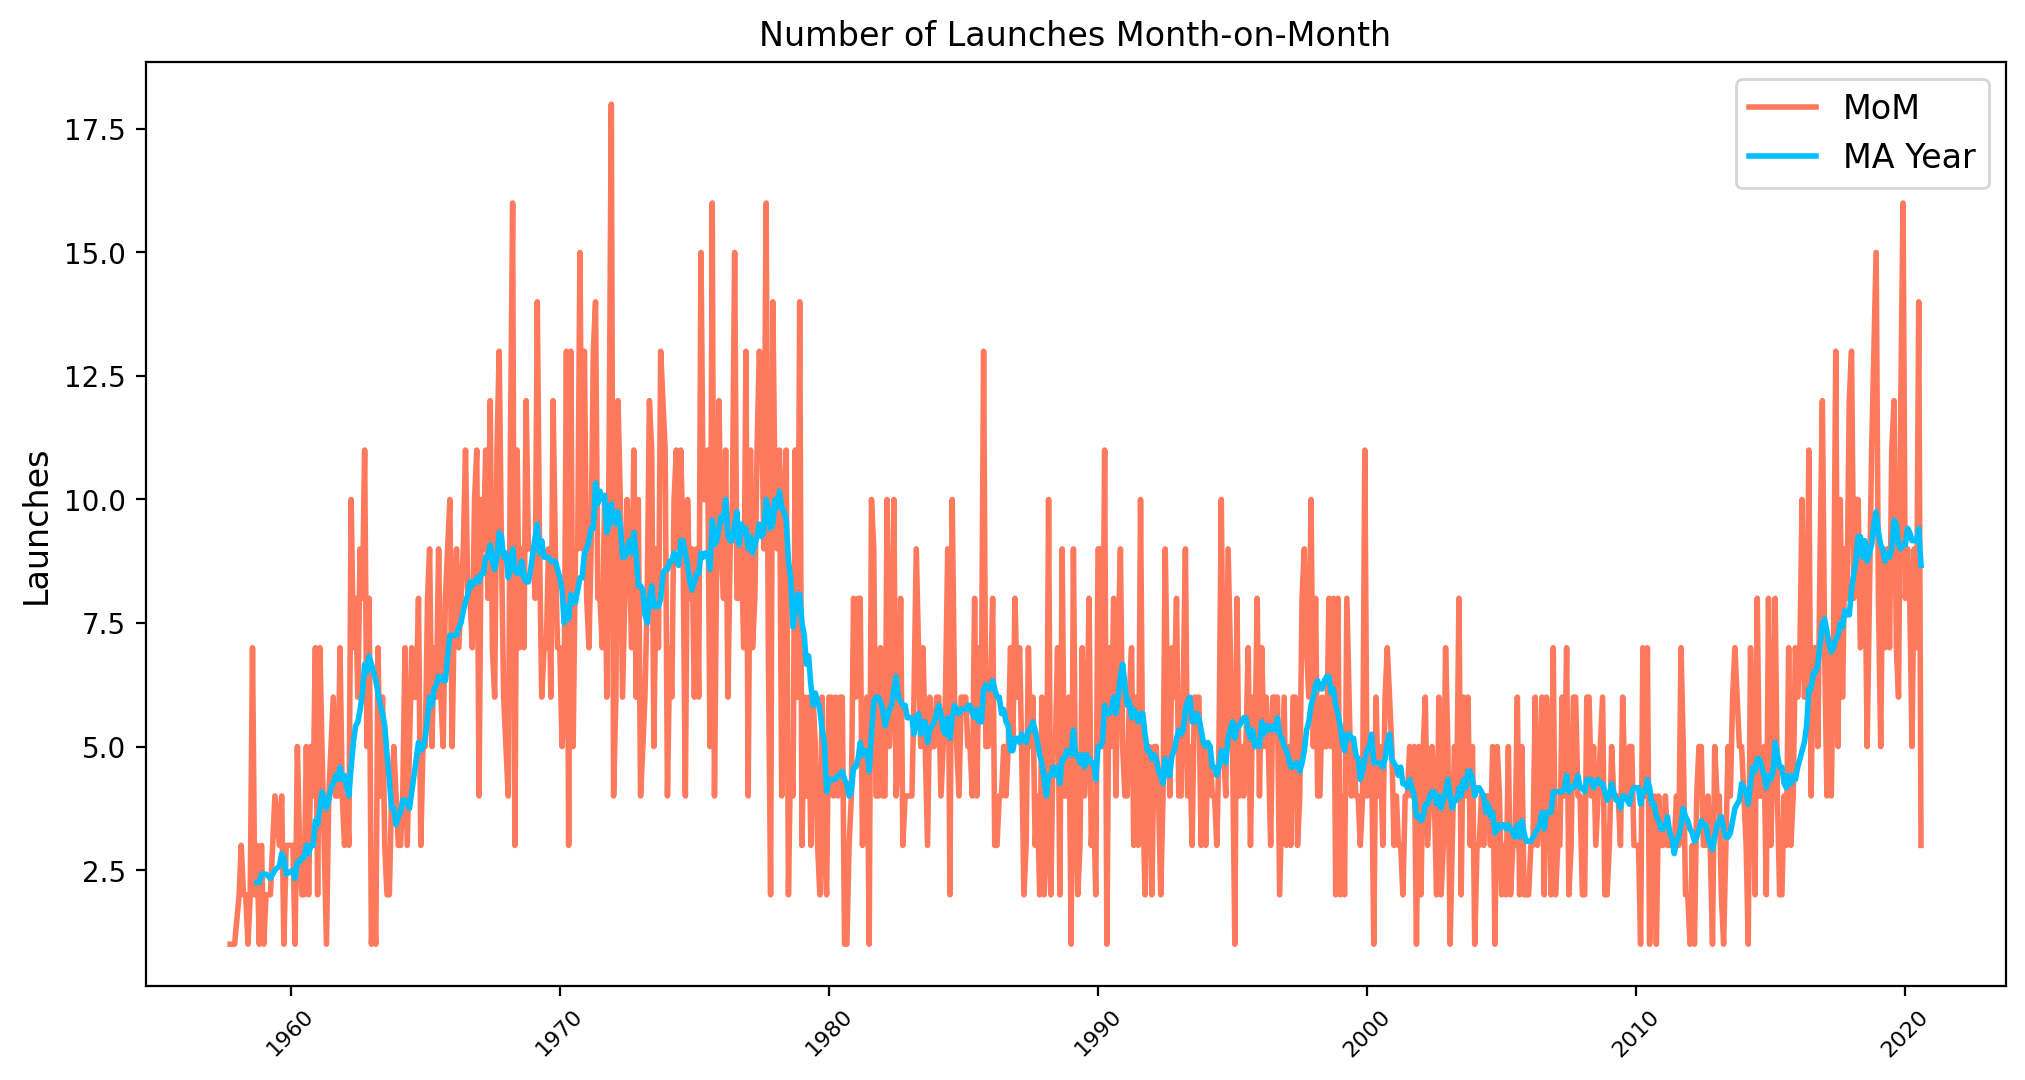

In [66]:
plt.figure(figsize=(12, 6), dpi=200)
plt.title("Number of Launches Month-on-Month")

plt.xticks(fontsize=8, rotation=45)

plt.ylabel("Launches", fontsize=12)

plt.plot(lch_per_ym.Date, lch_per_ym.Detail, color="#FF5733", linewidth=2, alpha=0.8, label="MoM")
plt.plot(lch_per_ym.Date, rolling_ym.Detail, color="deepskyblue", linewidth=2, label="MA Year")

plt.legend(fontsize=12)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
lch_per_month = df_data.groupby("Month", as_index=False).agg({"Detail": pd.Series.count})

In [ ]:
bar = px.bar(lch_per_month,
             x="Month",
             y="Detail",
             color="Detail",
             color_continuous_scale="Blues")

bar.update_layout(title="Most Popular and Least Popular for Launches",
                  yaxis_title="Launches")

bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
df_clean.Date = pd.to_datetime(df_clean.Date)
df_clean["Year"] = [date.year for date in df_clean.Date]
avg_price = df_clean.groupby("Year", as_index=False).agg({"Price": pd.Series.mean})

<ipython-input-40-b25af819681b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-b25af819681b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
line = px.line(avg_price,
               x="Year",
               y="Price")

line.update_layout(title="Average Price of Rocket Launches Over Time.",
                   yaxis_title="Average Price")

line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
temp_df = df_data.groupby(["Organisation", "Year"], as_index=False).agg({"Detail": pd.Series.count})
top10_org = list(temp_df.groupby("Organisation").agg({"Detail": pd.Series.sum}).sort_values(by="Detail", ascending=False)[:10].index)

reshaped_df = temp_df.pivot(index="Year", columns="Organisation", values="Detail")[top10_org]
reshaped_df

Organisation,RVSN USSR,Arianespace,General Dynamics,CASC,NASA,VKS RF,US Air Force,ULA,Boeing,Martin Marietta
Year,,,,,,,,,,
1957,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,5.00,NaN,NaN,NaN,2.00,NaN,2.00,NaN,NaN,NaN
1959,4.00,NaN,1.00,NaN,1.00,NaN,10.00,NaN,NaN,NaN
1960,9.00,NaN,5.00,NaN,4.00,NaN,21.00,NaN,NaN,NaN
1961,9.00,NaN,8.00,NaN,12.00,NaN,23.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016,NaN,11.00,NaN,22.00,NaN,4.00,NaN,12.00,NaN,NaN
2017,NaN,11.00,NaN,16.00,NaN,6.00,NaN,8.00,NaN,NaN
2018,NaN,11.00,NaN,37.00,NaN,5.00,NaN,8.00,NaN,NaN


In [ ]:
reshaped_df.fillna(0, inplace=True)

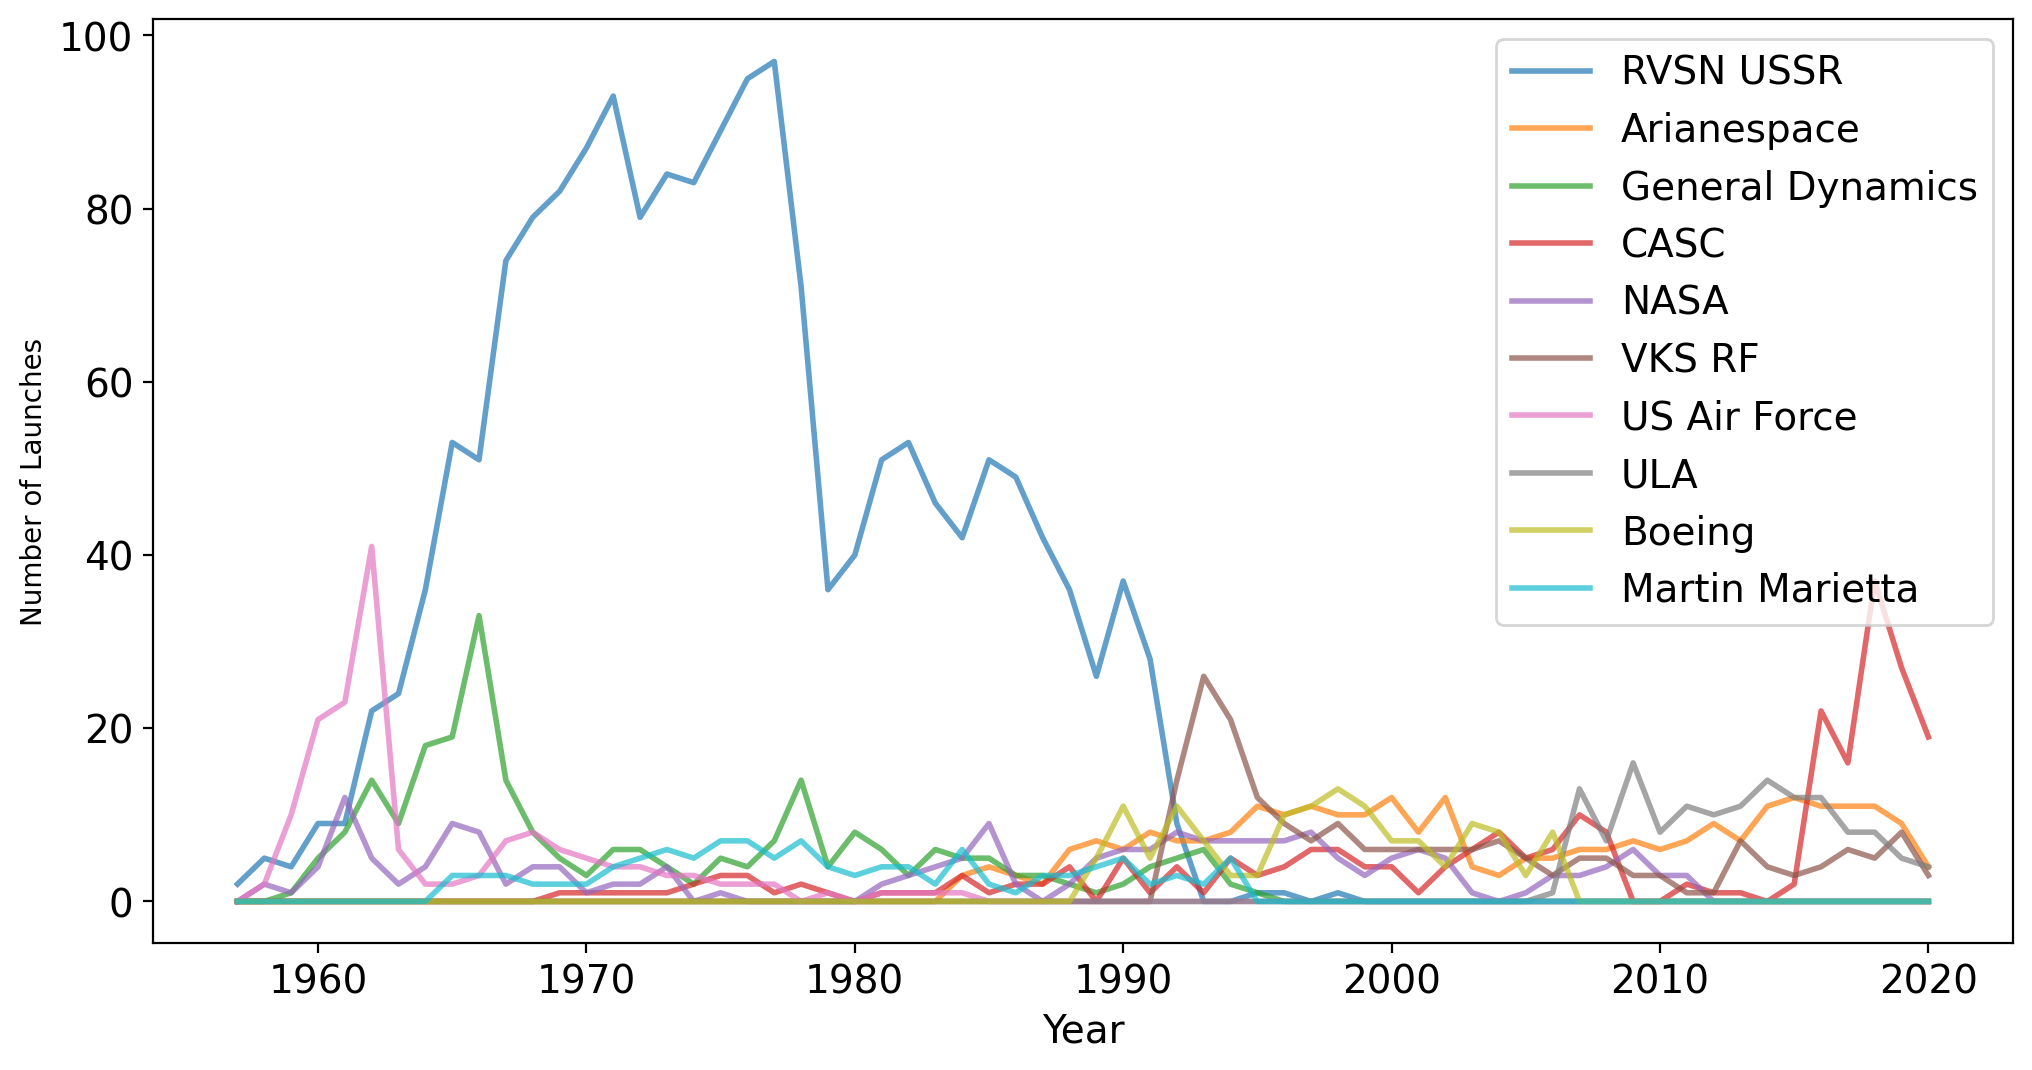

In [ ]:
plt.figure(figsize=(12,6), dpi=200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches")

for col in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[col], linewidth=2, label=reshaped_df[col].name, alpha=0.7)
plt.legend(fontsize=14)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
cold_war_df = df_data[df_data.Year <= 1991]

In [ ]:
cold_war_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,CHN,1991,12
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,KAZ,1991,12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,RUS,1991,12
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,"Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,FRA,1991,12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991,12


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
cold_war_df.Country.unique()

array(['CHN', 'KAZ', 'RUS', 'FRA', 'USA', 'JPN', 'ISR', 'IND', 'KEN',
       'AUS'], dtype=object)

In [ ]:
usa_ussr = []
for c in cold_war_df.Country:
    if c == "USA":
        usa_ussr.append("USA")
    elif c in ["RUS", "KAZ"]:
        usa_ussr.append("USSR")
    else:
        usa_ussr.append("other")

cold_war_df["USA_USSR"] = usa_ussr

<ipython-input-57-c207aaabafd4>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
usa_vs_ussr = cold_war_df[cold_war_df["USA_USSR"] != "other"].groupby("USA_USSR", as_index=False).agg({"Detail": pd.Series.count})

In [ ]:
pie = px.pie(usa_vs_ussr,
             names="USA_USSR",
             values="Detail",
             title="Comparing the Total Number of Launches of the USSR and the USA",
             hole=0.4)

pie.update_traces(textinfo="value+percent+label")

pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
usa_ussr_df = cold_war_df.drop(cold_war_df[cold_war_df.USA_USSR == "other"].index)

In [ ]:
year_vs = usa_ussr_df.groupby(["USA_USSR","Year"], as_index=False).count()

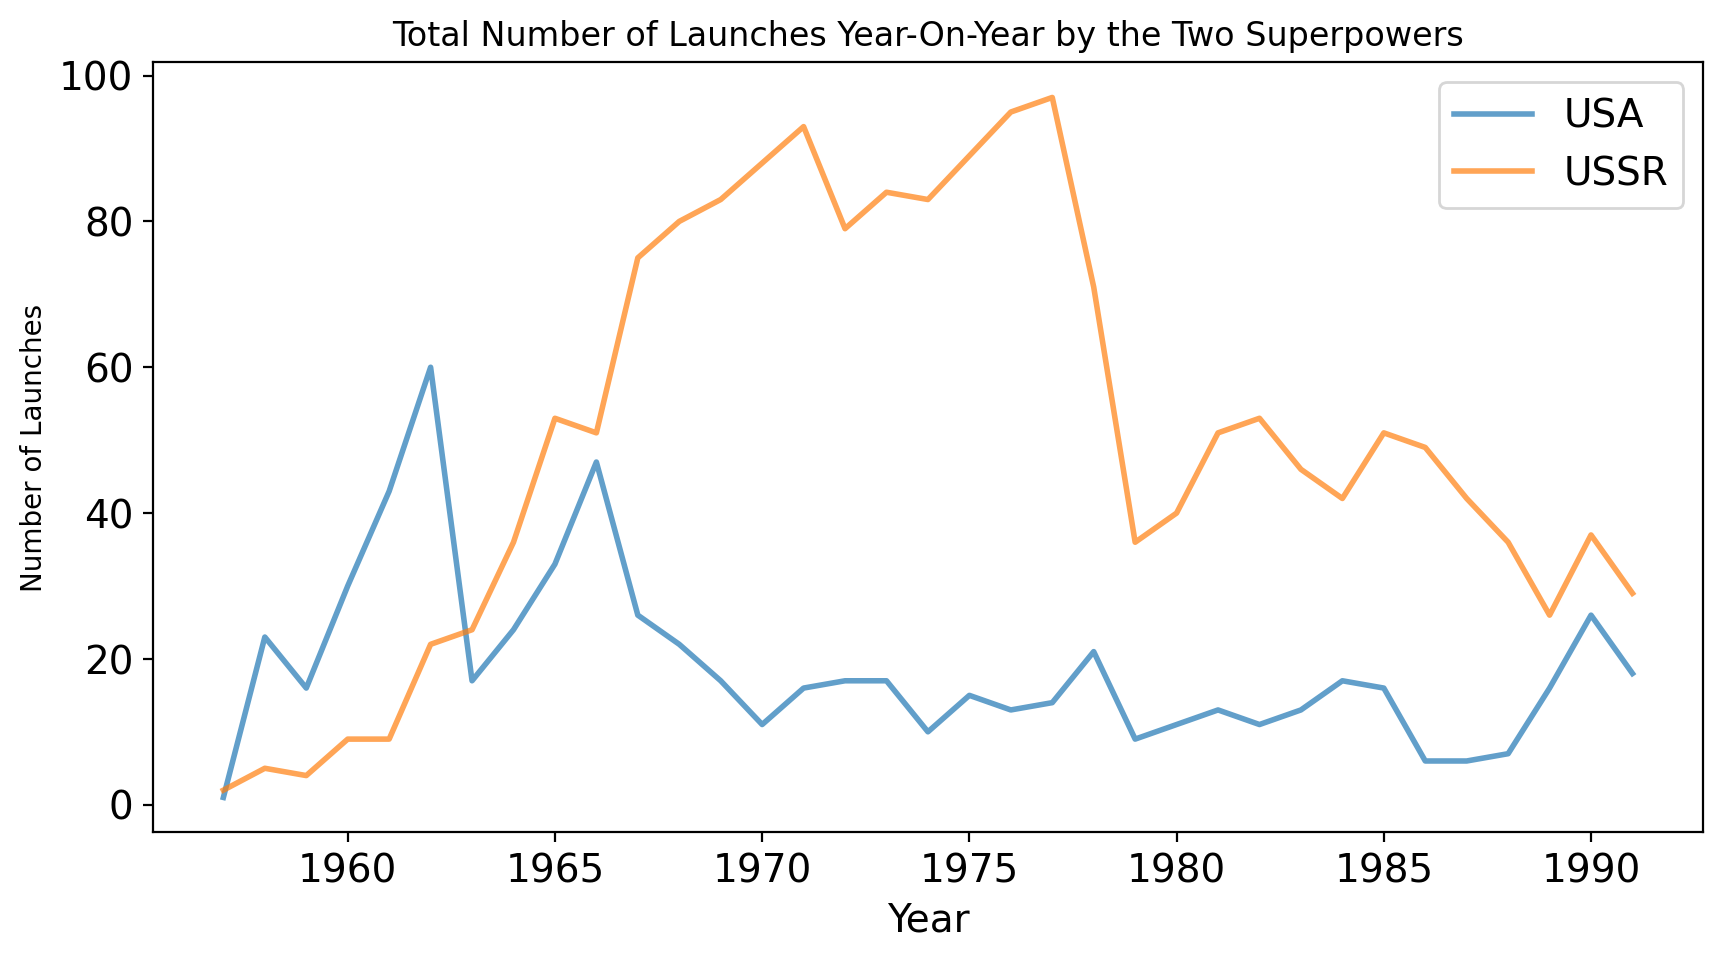

In [ ]:
vs_reshaped = year_vs.pivot(index="Year", columns="USA_USSR", values="Detail")

plt.figure(figsize=(10,5), dpi=200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches")
plt.title("Total Number of Launches Year-On-Year by the Two Superpowers")

for col in vs_reshaped.columns:
    plt.plot(vs_reshaped.index, vs_reshaped[col], linewidth=2, label=vs_reshaped[col].name, alpha=0.7)
plt.legend(fontsize=14)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
failure_vs = usa_ussr_df[usa_ussr_df.Mission_Status == "Failure"].groupby(["USA_USSR", "Year"], as_index=False).count()

In [ ]:
fail_vs_reshaped = failure_vs.pivot(index="Year", columns="USA_USSR", values="Detail")
fail_vs_reshaped.fillna(0, inplace=True)

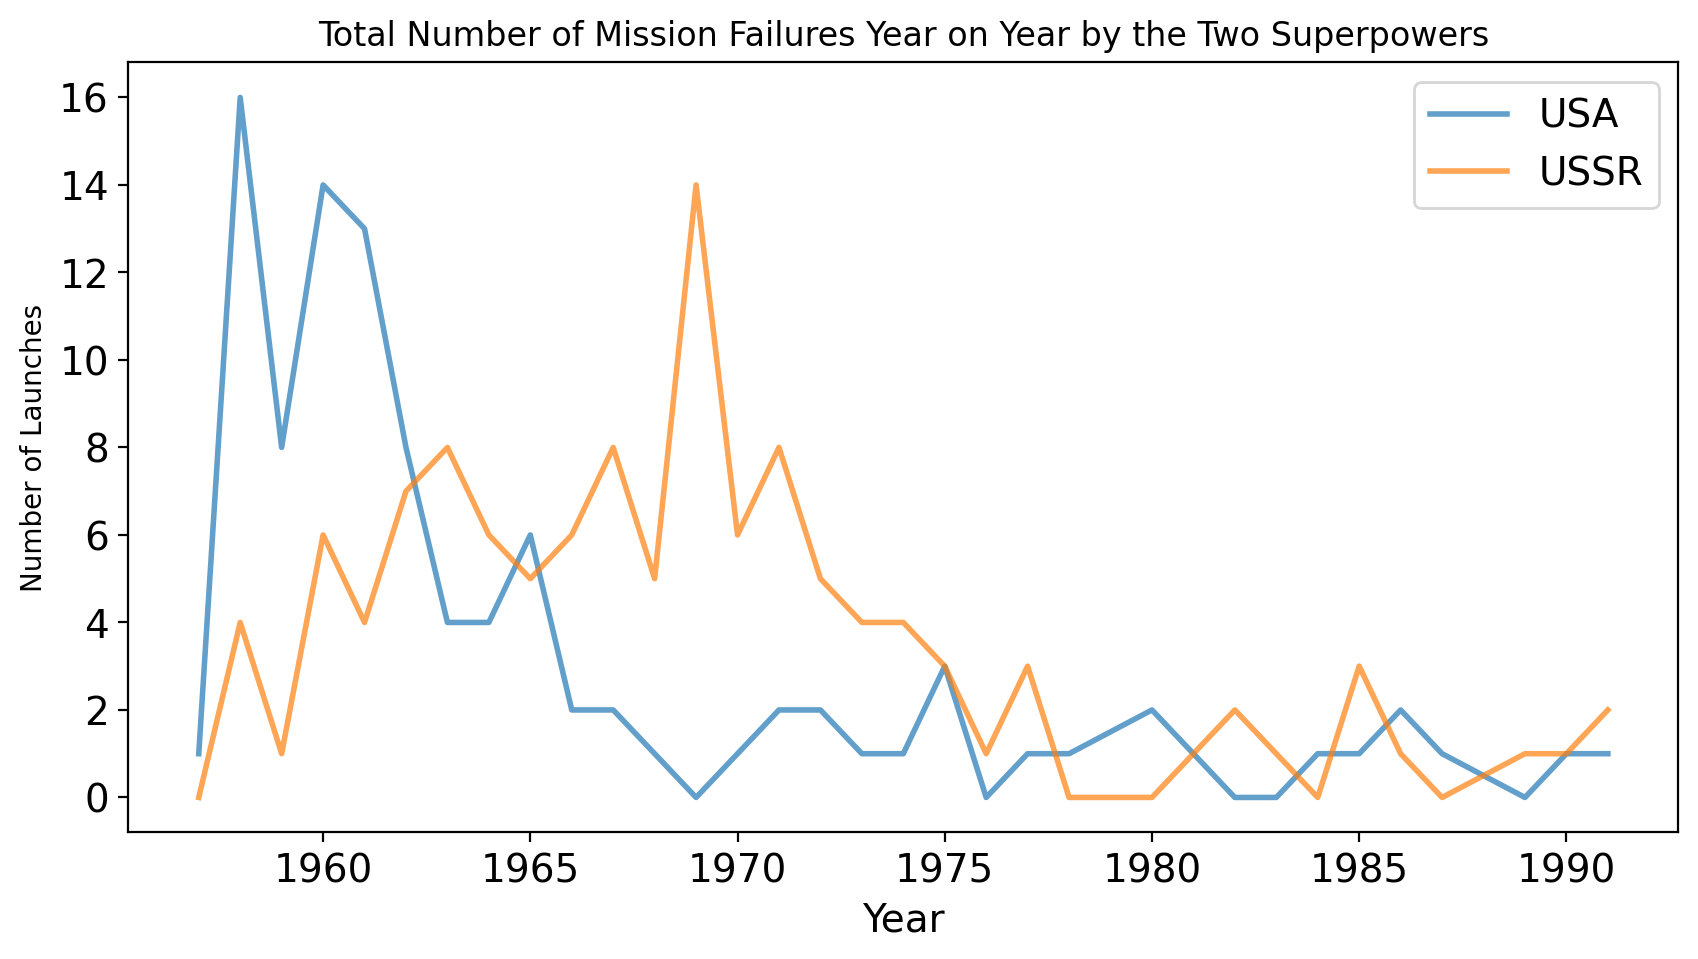

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches")
plt.title("Total Number of Mission Failures Year on Year by the Two Superpowers")

for col in fail_vs_reshaped.columns:
    plt.plot(fail_vs_reshaped.index, fail_vs_reshaped[col], linewidth=2, label=fail_vs_reshaped[col].name, alpha=0.7)
plt.legend(fontsize=14)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
total_mission = usa_ussr_df.groupby(["USA_USSR", "Year"]).count()["Mission_Status"]
success_mission = usa_ussr_df[usa_ussr_df.Mission_Status == "Success"].groupby(["USA_USSR", "Year"]).count()["Mission_Status"]

In [ ]:
fail_rate = (total_mission - success_mission) / total_mission
fail_rate.fillna(1, inplace=True)

fail_rate_reshaped = fail_rate.reset_index().pivot(index="Year", columns="USA_USSR", values="Mission_Status")

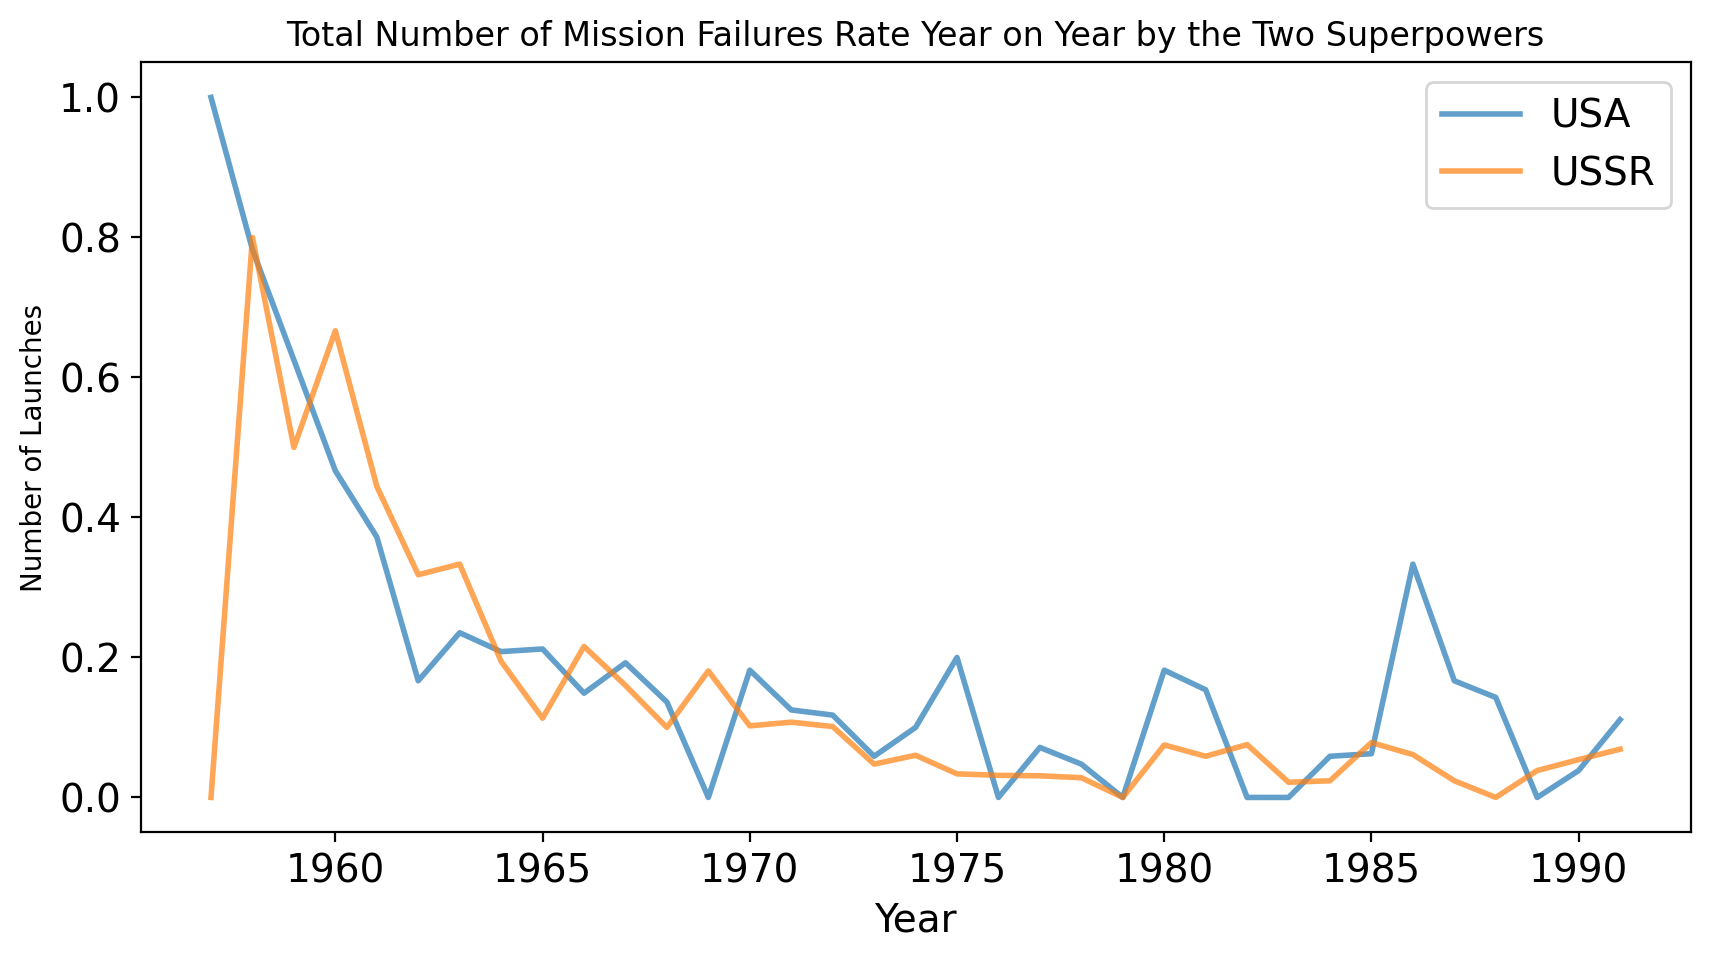

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches")
plt.title("Total Number of Mission Failures Rate Year on Year by the Two Superpowers")

for col in fail_rate_reshaped.columns:
    plt.plot(fail_rate_reshaped.index, fail_rate_reshaped[col], linewidth=2, label=fail_rate_reshaped[col].name, alpha=0.7)
plt.legend(fontsize=14)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
a = df_data.groupby(["Year", "Country"], as_index=False).count()[["Year", "Country", "Detail"]]
b = a.groupby("Year",as_index=False).max()
year_max = pd.merge(a, b, on="Year")[["Year", "Country_x", "Detail_x", "Detail_y"]]
year_max.columns = ["Year", "Country", "Launches", "Max_Launches"]

max_country = year_max[year_max.Launches == year_max.Max_Launches]

In [ ]:
a = df_data[df_data.Mission_Status == "Success"].groupby(["Year", "Country"], as_index=False).count()[["Year", "Country", "Detail"]]
b = a.groupby("Year",as_index=False).max()
year_max_success = pd.merge(a, b, on="Year")[["Year", "Country_x", "Detail_x", "Detail_y"]]
year_max_success.columns = ["Year", "Country", "Success_Launches", "Max_Success_Launches"]

max_success_country = year_max_success[year_max_success.Success_Launches == year_max_success.Max_Success_Launches]

In [ ]:
fig = px.line(max_country,
              x="Year",
              y="Launches",
              text="Country")

fig.update_traces(textposition="top center")
fig.update_layout(title="Lead Country per Year",
                  height=800)

fig.show()

In [ ]:
fig = px.line(max_success_country,
              x="Year",
              y="Success_Launches",
              text="Country")

fig.update_traces(textposition="top center")
fig.update_layout(title="Lead Country per Year",
                  height=800)

fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
a = df_data.groupby(["Year", "Organisation"], as_index=False).count()[["Year", "Organisation", "Detail"]]
b = a.groupby("Year",as_index=False).max()
org_year_max = pd.merge(a, b, on="Year")[["Year", "Organisation_x", "Detail_x", "Detail_y"]]
org_year_max.columns = ["Year", "Organisation", "Launches", "Max_Launches"]

max_org = org_year_max[org_year_max.Launches == org_year_max.Max_Launches]

In [ ]:
fig = px.line(max_org,
              x="Year",
              y="Launches",
              text="Organisation")

fig.update_traces(textposition="top center")
fig.update_layout(title="Lead Organisation per Year",
                  height=800)

fig.show()